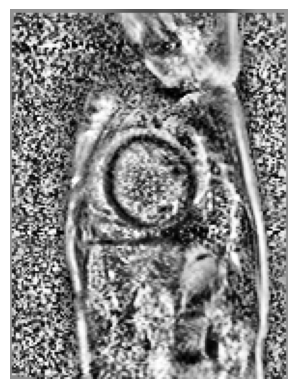

In [46]:
import mclahe as mc
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk
image_path = 'l:\\basic\Personal Archive\E\emquist\parsing_MRI\\final_test_seg\lge_for_clin\\11_DIST_1939_20110217_A0724_sagittal_tfi_psir_single-shot_10sl_psir_(192,144).nii.gz'



img = sitk.ReadImage(image_path)
img_array = sitk.GetArrayFromImage(img)
img_array = img_array.astype(np.float32)
kernel_size = (img_array.shape[0], 8, 8)
clip_limit=0.1
clahe_image = mc.core.mclahe(img_array, n_bins=256, clip_limit=clip_limit, kernel_size=kernel_size)
clahe_image = clahe_image.astype(float) /255
plt.figure()
plt.imshow(clahe_image[6], cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()




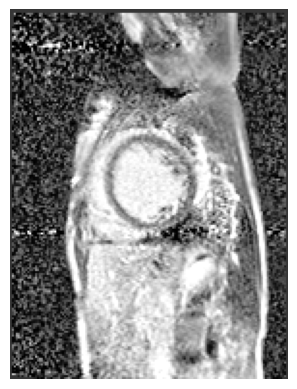

In [47]:
import cv2
from skimage import exposure
# Equalization
img_array = exposure.equalize_hist(img_array)
min_val, max_val = np.percentile(img_array, (1, 95))
img_array = ((img_array.astype(img_array.dtype) - min_val) / (max_val - min_val)).clip(0, 1)
# img_array = exposure.equalize_hist(img_array)

plt.figure()
plt.imshow(img_array[6],cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()
